# Programming For Data Science - Final Project

## Group members:

| Name              | ID       |
|-------------------|----------|
| Pham Dang Son Ha |21127206|
| Nguyen Cao Khoi   | 21127632 |

## Table of Contents

1. [Collecting Data](#collecting-data)

2. [Exploring And Preprocessing Data](#exploring-and-preprocessing-data)

3. [Asking Meaningful Questions And Analyzing](#asking-meaningful-questions-and-analyzing)

4. [Reflection](#reflection)
5. [References](#references)

## 1. Collecting Data

### _1.1. Subject And Source_

-  Subject: The [Online Retails Sale Dataset](https://www.kaggle.com/datasets/rohitmahulkar/online-retails-sale-dataset/data?fbclid=IwAR073q0CYe_aoD5bjPNrycjMGsDoXCxytfm8p7WpWJTBH9XkqrOCrbV_LRU) contains transactions from 12/01/2010 to 12/09/2011 of an online retail company based in the UK. It includes 10 attributes, and the number of rows in the dataset is 541,909 rows.

- Source: The author got this data from [Tata Data Visualisation: Empowering Business with Effective Insights](https://www.theforage.com/simulations/tata/data-visualisation-p5xo), which is a virtual internship program offered by Tata Insights and Quants (Tata iQ) on the Forage platform.

### _1.2. Authors And Copyright_

- Author: [Rohit Mahulkar](https://www.kaggle.com/rohitmahulkar) (Owner)

- Copyright: [CC0: Public Domain](https://creativecommons.org/publicdomain/zero/1.0/) - This means others can freely use, modify, and build upon these works for any purpose without any restrictions.

### _1.3. The way authors collect data_

- The author did not directly collect the data but was provided during his or her virtual internship program. In the program, participants are given a dataset and are tasked with cleaning, transforming, and analyzing the data to provide valuable insights

- The data collection methodology is not explicitly mentioned in the program. However, given that the dataset is about an online retail company, it’s likely that the data was collected from the company’s transaction records or customer database.

## 2. Exploring And Preprocessing Data

### _2.1. Import libraries_

In [30]:
# Import Required Libraries
!pip install pandas
!pip install numpy

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### _2.2. Loading the data_

In [31]:
data_df = pd.read_csv('Online Retail.csv')
data_df.head()

,InvoiceNo,InvoiceDate,InvoiceTime,StockCode,Description,Quantity,UnitPrice,Totalsale,CustomerID,Country
0,536365,01-12-2010,08:26:00 AM,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,15.30,17850.0,United Kingdom
1,536365,01-12-2010,08:26:00 AM,71053,WHITE METAL LANTERN,6,3.39,20.34,17850.0,United Kingdom
2,536365,01-12-2010,08:26:00 AM,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,22.00,17850.0,United Kingdom
3,536365,01-12-2010,08:26:00 AM,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,20.34,17850.0,United Kingdom
4,536365,01-12-2010,08:26:00 AM,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,20.34,17850.0,United Kingdom


### _2.3. How many rows and columns ?_

- There are 541909 rows and 10 columns

In [32]:
data_df.shape

(541909, 10)

### _2. What is the meaning of each row ?_

- Each row represent the detail information of a  online retail sale invoice of a customer.

In [33]:
data_df.sample(1)

,InvoiceNo,InvoiceDate,InvoiceTime,StockCode,Description,Quantity,UnitPrice,Totalsale,CustomerID,Country
539937,581451,08-12-2011,05:57:00 PM,21115,ROSE CARAVAN DOORSTOP,8,1.95,15.6,17144.0,United Kingdom


### _3. Are there duplicated rows?_

- There are 5268 duplicated rows

In [34]:
data_df.duplicated().sum()

5268

### _4. What is the meaning of each column?_

- `InvoiceNo`: Reciept No. for successfull order
- `InvoiceDate`: Date in which order place
- `InvoiceTime`: Time stamp in which order place relevant to geoghraphical location
- `StockCode`: Unique code of each product
- `Description`: Name of product (conatin some missing name of prodect which are return , damageded, lost etc..)
- `Quantity`: Number of quantity of product sold (conatain negative number of quantity which are return,damageded, lost, etc... to balance the product)
- `UnitPrice`: Selling price of single unit of prodcut
- `Totalsale`: Total of selling price
- `CustomerID`: Customer Id
- `Country`: Country Name

### _5. What is the current data type of each column?_

In [35]:
data_df.dtypes

InvoiceNo       object
InvoiceDate     object
InvoiceTime     object
StockCode       object
Description     object
Quantity         int64
UnitPrice      float64
Totalsale      float64
CustomerID     float64
Country         object
dtype: object

### _6.Are there columns having inappropriate data types?_

- There are 3 columns that have inapproriate data types: 
    - `InvoiceDate`: should be DataTime instead of object string.
    - `InvoiceTime`: should be DataTime instead of object string.
    - `CustomerID`: should be String object instead of float64.

In [36]:
data_df['InvoiceDate'] = pd.to_datetime(data_df['InvoiceDate'],format= '%d-%m-%Y')
data_df['InvoiceTime'] = pd.to_datetime(data_df['InvoiceTime'],format= '%H:%M:%S %p')
data_df['InvoiceTime'] = [time.time() for time in data_df['InvoiceTime']]
data_df['CustomerID'] = data_df['CustomerID'].apply("{:.0f}".format).astype(str) 

In [37]:
data_df.dtypes

InvoiceNo              object
InvoiceDate    datetime64[ns]
InvoiceTime            object
StockCode              object
Description            object
Quantity                int64
UnitPrice             float64
Totalsale             float64
CustomerID             object
Country                object
dtype: object

### _7. With each numerical column, how are values distributed?_

- All numberic columns

In [38]:
numeric_cols = data_df.columns[(data_df.dtypes != 'object') & (data_df.dtypes != 'datetime64[ns]')]  
numeric_cols

Index(['Quantity', 'UnitPrice', 'Totalsale'], dtype='object')

- The distribution of numerical attributes

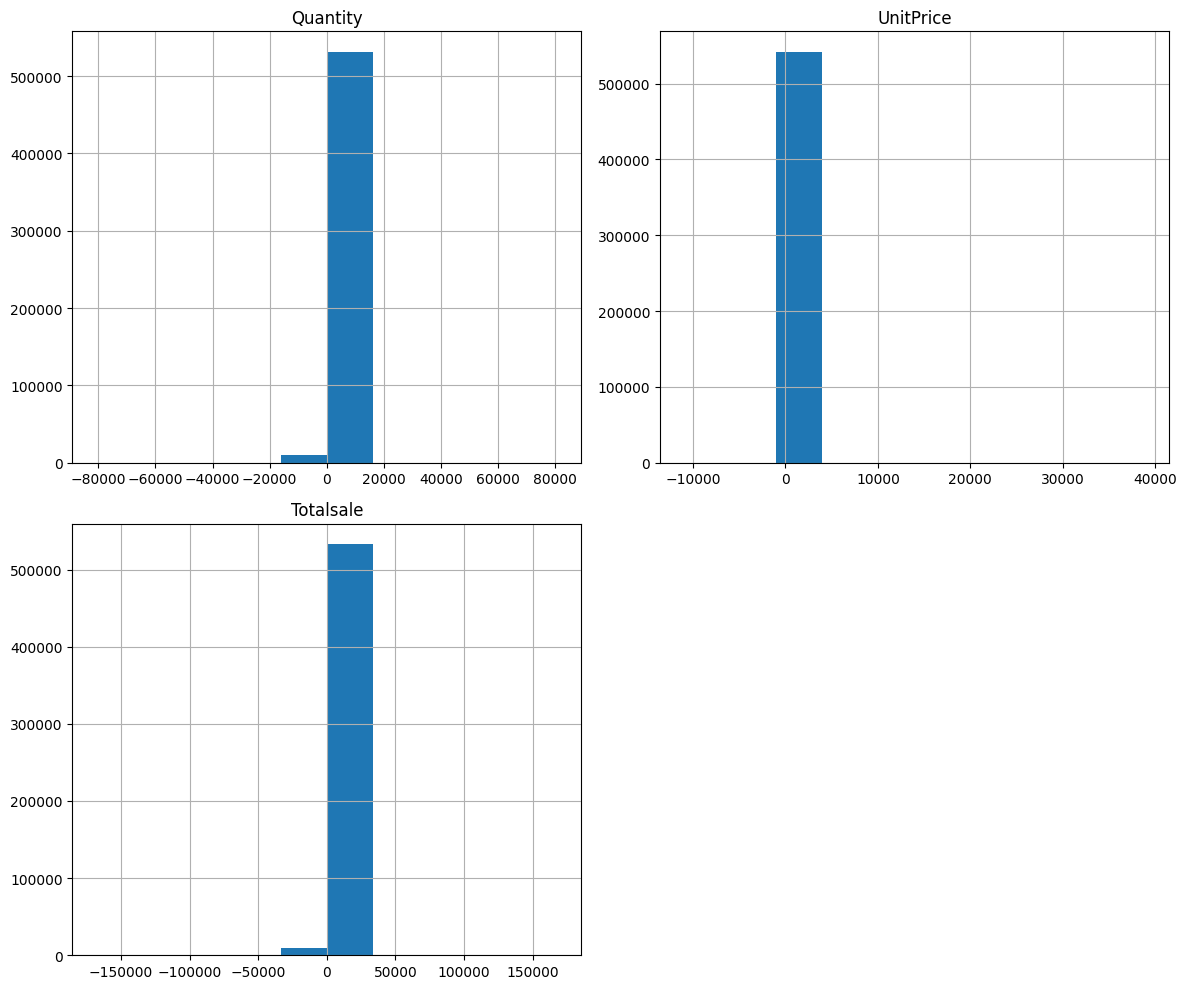

In [39]:
data_df[numeric_cols].hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

_7.1 What is the percentage of missing values?_

- The percentage of missing values for each columns

In [40]:
numebric_missing_percent = pd.DataFrame({
    'col_name': numeric_cols,
    'percent_missing': data_df[numeric_cols].isnull().sum() * 100 / len(data_df[numeric_cols]),
})
numebric_missing_percent.index = np.arange(0, len(numeric_cols))
numebric_missing_percent

,col_name,percent_missing
0,Quantity,0.0
1,UnitPrice,0.0
2,Totalsale,0.0


_7.2 Min? max? Are they abnormal?_

- The min value of each numberic column

In [41]:
data_df[numeric_cols].min()

Quantity     -80995.00
UnitPrice    -11062.06
Totalsale   -168469.60
dtype: float64

- The max value of each numberic column

In [42]:
data_df[numeric_cols].max()

Quantity      80995.0
UnitPrice     38970.0
Totalsale    168469.6
dtype: float64

- We can say that the data is not abnormal as for the shape of each histogram.

### _8. With each categorical column, how are values distributed?_

In [43]:
categorical_cols = data_df.columns[(data_df.dtypes == 'object') | (data_df.dtypes == 'datetime64[ns]')]
categorical_cols

Index(['InvoiceNo', 'InvoiceDate', 'InvoiceTime', 'StockCode', 'Description',
       'CustomerID', 'Country'],
      dtype='object')

- The distribution of the `InvoiceTime`, `InvoiceNo`, `StockCode`, `Description`, `CustomerID` column

In [44]:
data_df['InvoiceTime'].value_counts()

InvoiceTime
03:56:00    2628
02:41:00    2554
03:17:00    2376
04:14:00    2372
02:09:00    2172
            ... 
07:25:00       4
06:48:00       4
06:32:00       2
07:06:00       1
07:41:00       1
Name: count, Length: 718, dtype: int64

In [45]:
data_df['InvoiceNo'].value_counts()

InvoiceNo
573585     1114
581219      749
581492      731
580729      721
558475      705
           ... 
554023        1
554022        1
554021        1
554020        1
C558901       1
Name: count, Length: 25900, dtype: int64

In [46]:
data_df['StockCode'].value_counts()

StockCode
85123A    2313
22423     2203
85099B    2159
47566     1727
20725     1639
          ... 
21431        1
22275        1
17001        1
90187A       1
72759        1
Name: count, Length: 4070, dtype: int64

In [47]:
data_df['Description'].value_counts()

Description
WHITE HANGING HEART T-LIGHT HOLDER     2369
REGENCY CAKESTAND 3 TIER               2200
JUMBO BAG RED RETROSPOT                2159
PARTY BUNTING                          1727
LUNCH BAG RED RETROSPOT                1638
                                       ... 
Missing                                   1
historic computer difference?....se       1
DUSTY PINK CHRISTMAS TREE 30CM            1
WRAP BLUE RUSSIAN FOLKART                 1
PINK BERTIE MOBILE PHONE CHARM            1
Name: count, Length: 4223, dtype: int64

In [48]:
data_df['CustomerID'].value_counts()

CustomerID
nan      135080
17841      7983
14911      5903
14096      5128
12748      4642
          ...  
13270         1
17763         1
17291         1
15668         1
15562         1
Name: count, Length: 4373, dtype: int64

- The distribution of the `InvoiceDate` column

<BarContainer object of 305 artists>

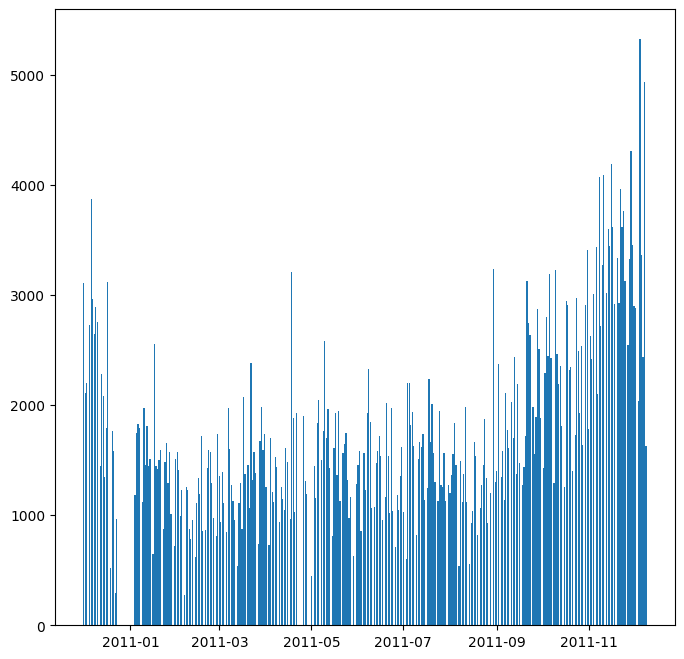

In [49]:
fig = plt.figure(figsize=(8, 8))
plt.bar(data_df['InvoiceDate'].value_counts().index, data_df['InvoiceDate'].value_counts().values)

- The distribution of the `Country` column

<BarContainer object of 38 artists>

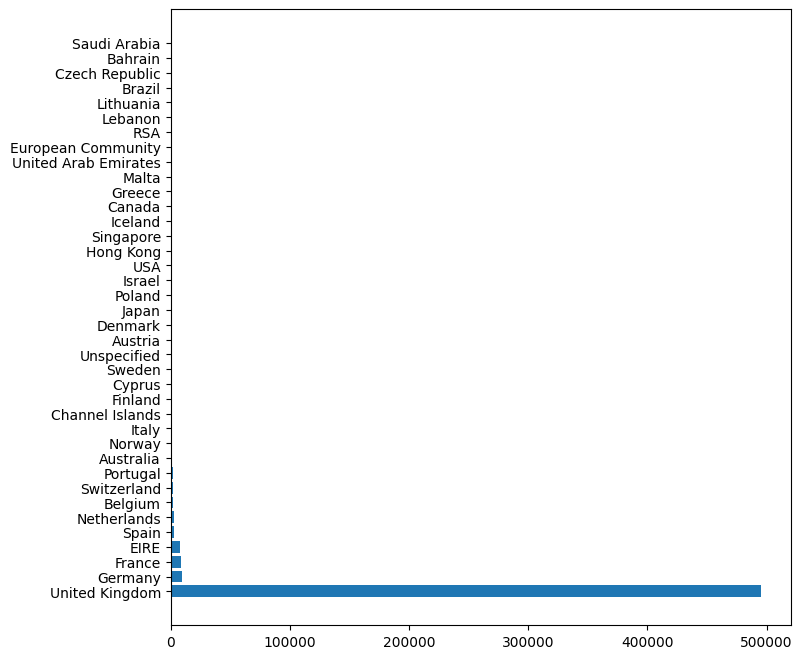

In [50]:
fig = plt.figure(figsize=(8, 8))
plt.barh(data_df['Country'].value_counts().index, data_df['Country'].value_counts().values)

_8.1 What is the percentage of missing values?_

In [51]:
categorical_missing_percent = pd.DataFrame({
    'col_name': categorical_cols,
    'percent_missing': data_df[categorical_cols].isnull().sum() * 100 / len(data_df[categorical_cols]),
})
categorical_missing_percent.index = np.arange(0, len(categorical_cols))
categorical_missing_percent

,col_name,percent_missing
0,InvoiceNo,0.000000
1,InvoiceDate,0.000000
2,InvoiceTime,0.000000
3,StockCode,0.000000
4,Description,0.268311
5,CustomerID,0.000000
6,Country,0.000000


_8.2 How many different values? Show a few_

In [52]:
unique_value = pd.DataFrame({
    'col_name': categorical_cols,
    'number_unique': data_df[categorical_cols].nunique(),
})
unique_value.index = np.arange(0, len(categorical_cols))
unique_value

,col_name,number_unique
0,InvoiceNo,25900
1,InvoiceDate,305
2,InvoiceTime,718
3,StockCode,4070
4,Description,4223
5,CustomerID,4373
6,Country,38


In [53]:
data_df['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [54]:
data_df['Description'].unique()

array(['WHITE HANGING HEART T-LIGHT HOLDER', 'WHITE METAL LANTERN',
       'CREAM CUPID HEARTS COAT HANGER', ..., 'lost',
       'CREAM HANGING HEART T-LIGHT HOLDER',
       'PAPER CRAFT , LITTLE BIRDIE'], dtype=object)

_8.3 Are they abnormal?_

- We can say that the data is not abnormal as for distribution of each column.

## Asking Meaningful Questions And Analyzing

## Reflection

## References